This notebook for Stardist applicationis adoptted from https://github.com/stardist/stardist/blob/main/examples/2D/3_prediction.ipynb

Students can use this as an initial notebook for more images with specific models and parameters.

Liya Ding 2024.10.01

In [1]:
import sys
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread, imwrite
from csbdeep.utils import normalize
from csbdeep.utils import download_and_extract_zip_file
import tifffile
from skimage.transform import resize

from cellpose import models, io


import pandas as pd
np.random.seed(6)


In [2]:
import os

In [3]:
root_folder = '/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Microtubule_GUV-Liu-20250106T211105Z-001'

folder_list = [x for x in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, x)) ]

In [4]:
output_folder = '/mnt/d/lding/CLS/mousumiLiuDinner/set1to5_processed_results'
processed_folder = output_folder+'/Microtubule_GUV-Liu-20250106T211105Z-001/processed_MT/'

if not os.path.isdir(output_folder):   os.makedirs(output_folder)
if not os.path.isdir(processed_folder):   os.makedirs(processed_folder)


In [5]:
folder_list

['Microtubule_GUV-Liu', 'processed_MT']

In [6]:
df = pd.DataFrame(columns=['GUV_folder_path','GUV_file_name','MT_folder_path','MT_file_name','condition','date'])

for  folder_ID in range(len(folder_list)):
    sub_folder = os.path.join(root_folder, folder_list[folder_ID])
    # print(sub_folder)
    sub_folder_list = [x for x in os.listdir(sub_folder) if os.path.isdir(os.path.join(sub_folder, x)) ]
    for  sub_folder_ID in range(len(sub_folder_list)):
        sub_sub_folder =  os.path.join(sub_folder, sub_folder_list[sub_folder_ID])
        # print(sub_sub_folder)
        sub_sub_folder_list = [x for x in os.listdir(sub_sub_folder) if os.path.isdir(os.path.join(sub_sub_folder, x)) ]
        for  sub_sub_folder_ID in range(len(sub_sub_folder_list)):
            sub_sub_sub_folder =  os.path.join(sub_sub_folder, sub_sub_folder_list[sub_sub_folder_ID])
            # print(sub_sub_sub_folder)
            GUV_sub_sub_sub_folder =  os.path.join(sub_sub_sub_folder, 'GUV')
            MT_sub_sub_sub_folder =  os.path.join(sub_sub_sub_folder, 'Microtubule')
            
            # print(sub_sub_sub_sub_folder)
            sub_sub_sub_filename_list = [x for x in os.listdir(GUV_sub_sub_sub_folder) if os.path.isfile(os.path.join(GUV_sub_sub_sub_folder, x)) and ('.TIF' in x) ]
            for  sub_sub_sub_filename_ID in range(len(sub_sub_sub_filename_list)):
                GUV_filename =  sub_sub_sub_filename_list[sub_sub_sub_filename_ID]


                if GUV_filename[-7:] == "GUV.TIF":
                    MT_filename = GUV_filename.replace("GUV.TIF","MT.TIF")
                else:
                    MT_filename = GUV_filename.replace("_w1561.TIF","_w2640.TIF")


                GUV_file_path = os.path.join(GUV_sub_sub_sub_folder, GUV_filename)
                MT_file_path = os.path.join(MT_sub_sub_sub_folder, MT_filename)

                if(os.path.isfile(GUV_file_path) and os.path.isfile(MT_file_path)):
                ##########################
                # Liya check if both path exists                
                    # print(file_path)                    
                    s = pd.DataFrame([[GUV_sub_sub_sub_folder, GUV_filename,MT_sub_sub_sub_folder, MT_filename, sub_folder_list[sub_folder_ID],sub_sub_folder_list[sub_sub_folder_ID]]],
                                    columns=['GUV_folder_path','GUV_file_name','MT_folder_path','MT_file_name','condition','date'])
                    df = pd.concat([df, s], ignore_index=True)
                else:
                    MT_filename = GUV_filename.replace("_w2561.TIF","_w1640.TIF")
                    MT_file_path = os.path.join(MT_sub_sub_sub_folder, MT_filename)

                    if(os.path.isfile(GUV_file_path) and os.path.isfile(MT_file_path)):
                        s = pd.DataFrame([[GUV_sub_sub_sub_folder, GUV_filename,MT_sub_sub_sub_folder, MT_filename, sub_folder_list[sub_folder_ID],sub_sub_folder_list[sub_sub_folder_ID]]],
                                    columns=['GUV_folder_path','GUV_file_name','MT_folder_path','MT_file_name','condition','date'])
                        df = pd.concat([df, s], ignore_index=True)
                    else:
                        print(GUV_file_path)
                        print(MT_file_path)


/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Microtubule_GUV-Liu-20250106T211105Z-001/Microtubule_GUV-Liu/1_10 Tau_Tubulin/Date 3/GUV/Image 4_GUV.TIF
/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Microtubule_GUV-Liu-20250106T211105Z-001/Microtubule_GUV-Liu/1_10 Tau_Tubulin/Date 3/Microtubule/Image 4_GUV.TIF
/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Microtubule_GUV-Liu-20250106T211105Z-001/Microtubule_GUV-Liu/1_10 Tau_Tubulin/Date 5/GUV/1 uM tau mt encap guv53_w1561.TIF
/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Microtubule_GUV-Liu-20250106T211105Z-001/Microtubule_GUV-Liu/1_10 Tau_Tubulin/Date 5/Microtubule/1 uM tau mt encap guv53_w1561.TIF
/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Microtubule_GUV-Liu-20250106T211105Z-001/Microtubule_GUV-Liu/2_10 Tau_Tubulin/Date 4/GUV/IMAGE 31_w2561.TIF
/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Microtubule_GUV-Liu-20250106T211105Z-001/Microtubule_GUV-Liu/2_10 Tau_Tubulin/Date 4/Microtubule/IMAGE 31_w1640.TIF


In [7]:
df

,GUV_folder_path,GUV_file_name,MT_folder_path,MT_file_name,condition,date
0,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,Image10_GUV.TIF,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,Image10_MT.TIF,1_10 Tau_Tubulin,Date 1
1,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,Image1_GUV.TIF,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,Image1_MT.TIF,1_10 Tau_Tubulin,Date 1
2,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,Image2_GUV.TIF,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,Image2_MT.TIF,1_10 Tau_Tubulin,Date 1
3,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,Image3_GUV.TIF,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,Image3_MT.TIF,1_10 Tau_Tubulin,Date 1
4,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,Image4_GUV.TIF,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,Image4_MT.TIF,1_10 Tau_Tubulin,Date 1
...,...,...,...,...,...,...
380,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,2 uM tau mt encap guv88_w1561.TIF,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,2 uM tau mt encap guv88_w2640.TIF,3_10 Tau_Tubulin,Date 5
381,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,2 uM tau mt encap guv89_w1561.TIF,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,2 uM tau mt encap guv89_w2640.TIF,3_10 Tau_Tubulin,Date 5
382,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,2 uM tau mt encap guv91_w1561.TIF,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,2 uM tau mt encap guv91_w2640.TIF,3_10 Tau_Tubulin,Date 5
383,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,2 uM tau mt encap guv94_w1561.TIF,/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Mic...,2 uM tau mt encap guv94_w2640.TIF,3_10 Tau_Tubulin,Date 5


### Segmentation with cellpose pretrained models


In [8]:
# DEFINE CELLPOSE MODEL
# model_type='cyto3' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto3')



/home/ldin/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/cellpose/resnet_torch.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, ma

In [9]:
from skimage.measure import label, regionprops, regionprops_table
from matplotlib import cm
from skimage import filters

In [10]:
from matplotlib import cm
# build the colormap with iterative tab10
tab10 = cm.get_cmap('tab10', 10)
for i in range(10):
    tab10.colors = np.concatenate([tab10.colors,tab10.colors],axis=0)    
tab10.colors = np.concatenate([np.zeros([1,4]),tab10.colors],axis=0)

newmap = cm.get_cmap('tab10', 200+1)
newmap.colors = tab10.colors[0:200+1,:]
newmap.colors[0,:]  = np.zeros([1,4])
newmap.colors[0,3] = 1

/tmp/ipykernel_73237/1700555406.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10', 10)
/tmp/ipykernel_73237/1700555406.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  newmap = cm.get_cmap('tab10', 200+1)


In [11]:
number_img = len(df)
guv_img_all = np.zeros([number_img,512,512])
mt_img_all = np.zeros([number_img,512,512])

for row_ID in range(number_img): 
    GUV_file_path = os.path.join(df.iloc[row_ID]['GUV_folder_path'],df.iloc[row_ID]['GUV_file_name'])
    MT_file_path = os.path.join(df.iloc[row_ID]['MT_folder_path'],df.iloc[row_ID]['MT_file_name'])
           
    # print(file_path)
    guv_img = imread(GUV_file_path)
    mt_img = imread(MT_file_path)
    if guv_img.ndim ==3:
        guv_img = guv_img.max(axis=0).squeeze()
    if mt_img.ndim ==3:
        mt_img = mt_img.max(axis=0).squeeze()

    guv_img_all[row_ID,0:guv_img.shape[0],0:guv_img.shape[1]] = guv_img
    mt_img_all[row_ID,0:mt_img.shape[0],0:mt_img.shape[1]] = mt_img
    

In [12]:
guv_img_all[guv_img_all==0] = np.nan
mt_img_all[mt_img_all==0] = np.nan

In [13]:
guv_bg_img = np.nanmedian(guv_img_all, axis=0)
mt_bg_img = np.nanmedian(mt_img_all, axis=0)


from skimage.filters import median, gaussian
from skimage.morphology import disk

guv_bg_img_filtered = median(guv_bg_img, disk(5))
mt_bg_img_filtered  = median(mt_bg_img, disk(5))

# guv_bg_img_filtered_smooth = gaussian(guv_bg_img_filtered, 5)
# mt_bg_img_filtered_smooth = gaussian(mt_bg_img_filtered, 5)


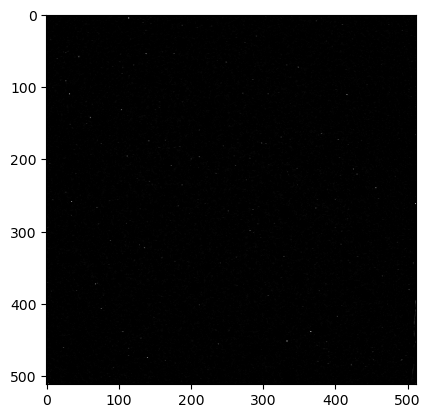

In [14]:
plt.imshow(guv_bg_img - guv_bg_img_filtered, clim=(0,70), cmap='gray')

In [15]:
guv_bg_int = np.nanmedian(guv_bg_img.ravel()) 
mt_bg_int = np.nanmedian(mt_bg_img.ravel()) 

In [16]:
guv_bg_int

156.0

In [17]:
mt_bg_int = 122

In [18]:
guv_bg_int = 110

In [19]:
guv_img_all = np.nan_to_num(guv_img_all, nan=guv_bg_int)
mt_img_all = np.nan_to_num(mt_img_all, nan=mt_bg_int)

In [20]:
pad_guv_img_all = np.zeros([number_img,512+128,512+128]) + guv_bg_int
guv_img_no_bg = np.zeros([number_img,512,512])

pad_mt_img_all = np.zeros([number_img,512+128,512+128]) + mt_bg_int
mt_img_no_bg = np.zeros([number_img,512,512])

for i in range(number_img):

    GUV_file_name = df.iloc[i]['GUV_file_name']
    condition = df.iloc[i]['condition']
    date = df.iloc[i]['date']

    fig1, ax1 = plt.subplots(2, 4, figsize=(16, 8))
    fig1.suptitle(condition+', '+date+', '+GUV_file_name)
    ax1[0,0].imshow(guv_bg_img,cmap='gray',vmin=80,vmax=500)
    ax1[0,0].axis('off')
    ax1[0,0].set_title('bg')
    ax1[0,1].imshow(guv_img_all[i,:,:],cmap='gray',vmin=80,vmax=500)
    ax1[0,1].axis('off')
    ax1[0,1].set_title('org')
    # guv_img_no_bg[i,:,:]  = guv_img_all[i,:,:] 
    guv_img_no_bg[i,:,:]  = guv_img_all[i,:,:] - guv_bg_img_filtered + guv_bg_int + 20
    
    ax1[0,2].imshow(guv_img_no_bg[i,:,:],cmap='gray',vmin=80,vmax=500)
    ax1[0,2].axis('off')
    ax1[0,2].set_title('bg rm')
    pad_guv_img_all[i,64:64+512,64:64+512] = guv_img_no_bg[i,:,:]
    pad_guv_img_all[i,:] = pad_guv_img_all[i,:] + 10
    ax1[0,3].imshow(pad_guv_img_all[i,:,:],cmap='gray',vmin=80,vmax=500)
    ax1[0,3].axis('off')
    ax1[0,3].set_title('pd')

    ax1[1,0].imshow(mt_bg_img,cmap='gray',vmin=80,vmax=500)
    ax1[1,0].axis('off')
    ax1[1,0].set_title('bg')
    ax1[1,1].imshow(mt_img_all[i,:,:],cmap='gray',vmin=80,vmax=500)
    ax1[1,1].axis('off')
    ax1[1,1].set_title('org')
    mt_img_no_bg[i,:,:]  = mt_img_all[i,:,:] - mt_bg_img_filtered + mt_bg_int + 20
    # mt_img_no_bg[i,:,:]  = mt_img_all[i,:,:] 
    ax1[1,2].imshow(mt_img_no_bg[i,:,:],cmap='gray',vmin=80,vmax=500)
    ax1[1,2].axis('off')
    ax1[1,2].set_title('bg rm')
    pad_mt_img_all[i,64:64+512,64:64+512] = mt_img_no_bg[i,:,:]
    pad_mt_img_all[i,:] = pad_mt_img_all[i,:] + 10
    ax1[1,3].imshow(pad_mt_img_all[i,:,:],cmap='gray',vmin=80,vmax=500)
    ax1[1,3].axis('off')
    ax1[1,3].set_title('pd')

    fig1.savefig(processed_folder+'pre-processed-guv-mt-'+ str(i).zfill(2) +'.jpg')
    plt.close(fig1)


In [60]:
stardist_display_folder =  processed_folder + 'GUV-MT_obj_detect_filter_selected_std15'
obj_crop_panel_folder = processed_folder + 'GUV-MT_obj_panel_selected_std15'
tiff_folder= processed_folder + 'GUV-MT_obj_tiff_selected_std15'
png_folder= processed_folder + 'GUV-MT_obj_png_selected_std15'  
singlecell_annotation_folder = processed_folder + 'singlecell_annotation_selected_std15' 

if not os.path.isdir(stardist_display_folder):   os.makedirs(stardist_display_folder)
if not os.path.isdir(obj_crop_panel_folder):   os.makedirs(obj_crop_panel_folder)
if not os.path.isdir(tiff_folder):   os.makedirs(tiff_folder)
if not os.path.isdir(png_folder):   os.makedirs(png_folder)
os.makedirs(singlecell_annotation_folder, exist_ok=True)

In [26]:
mt_img_medianfiltered = median(mt_img, disk(3))

In [63]:
guv_img_all_smooth = guv_img_all.copy()
mt_img_all_smooth = mt_img_all.copy()
for row_ID in range(df.shape[0]): 
    guv_img_all_smooth = filters.gaussian(guv_img_all[row_ID], sigma)
    mt_img_all_smooth = filters.gaussian(mt_img_all[row_ID], sigma)    

guv_1p = np.percentile(guv_img_all_smooth[guv_img_all_smooth>0],0.001)
guv_99p = np.percentile(guv_img_all_smooth[guv_img_all_smooth>0],99.95)
mt_1p = np.percentile(mt_img_all_smooth[mt_img_all_smooth>0],0.001)
mt_99p = np.percentile(mt_img_all_smooth[mt_img_all_smooth>0],99.95)



In [65]:
mt_1p=100

In [64]:
mt_99p

643.8565225813601

In [66]:
cell_cropped_array =np.zeros([2000,96,96])
cell_cropped_cellalone_array =np.zeros([2000,96,96])
cell_ind=0
plt.rcParams.update({'font.size': 16})
sigma = 1



cell_index = 0
    
cell_df = pd.DataFrame(columns=['GUV_folder_path','GUV_file_name','MT_folder_path','MT_file_name','condition','date','cell_ID','cell_index','cx','cy','diameter','bbox_1','bbox_2','bbox_3','bbox_4','obj_folder','obj_filename'])

for row_ID in range(df.shape[0]): 
# for row_ID in range(20): 
    GUV_file_path = os.path.join(df.iloc[row_ID]['GUV_folder_path'],df.iloc[row_ID]['GUV_file_name'])
    MT_file_path = os.path.join(df.iloc[row_ID]['MT_folder_path'],df.iloc[row_ID]['MT_file_name'])
    
    GUV_folder_path = df.iloc[row_ID]['GUV_folder_path']
    MT_folder_path = df.iloc[row_ID]['MT_folder_path']
    GUV_file_name = df.iloc[row_ID]['GUV_file_name']
    MT_file_name = df.iloc[row_ID]['MT_file_name']
    condition = df.iloc[row_ID]['condition']
    date = df.iloc[row_ID]['date']
    
    guv_img = guv_img_all[row_ID,:,:]
    mt_img = mt_img_all[row_ID,:,:]
    mt_img_medianfiltered = median(mt_img, disk(3))
    # img = imread(file_path)
    # img = np.sqrt(img)
    guv_smooth = filters.gaussian(guv_img, sigma)
    guv_img_normed = normalize(guv_smooth,1,99)
    mt_smooth = filters.gaussian(mt_img_medianfiltered, sigma)
    guv_img_normed = (guv_smooth-guv_1p)/(guv_99p-guv_1p)
    guv_img_normed[guv_img_normed<0] = 0
    guv_img_normed[guv_img_normed>1] = 1
    mt_img_normed = (mt_smooth-mt_1p)/(mt_99p-mt_1p)
    mt_img_normed[mt_img_normed<0] = 0
    mt_img_normed[mt_img_normed>1] = 1
    
    guv_mt_img = np.zeros([2,512,512])
    guv_mt_img[0,:] = guv_img_normed
    guv_mt_img[1,:] = mt_img_normed
    
    guv_img_pad = pad_guv_img_all[row_ID,:,:]
    mt_img_pad = pad_mt_img_all[row_ID,:,:]
    mt_img_pad = median(mt_img_pad, disk(3))
    
       # cellpose
    labels, flows, styles, diams = model.eval(guv_mt_img[:,::2,::2],channels=[1,2])
    us_manual = np.zeros([512,512])
    us_manual[::2,::2]=labels
    us_manual[1::2,::2]=labels
    us_manual[::2,1::2]=labels
    us_manual[1::2,1::2]=labels
    
    labels = us_manual.astype(int)
    
    fig2, ax2 = plt.subplots(2, 3, figsize=(16, 8))
    fig2.suptitle(condition+', '+date+', '+GUV_file_name)
    ax2[0,0].imshow(guv_img_normed, clim=(0,1), cmap='gray')    
    ax2[0,0].axis('off')
    ax2[0,0].set_title('GUV')
    ax2[0,1].imshow(guv_img_normed, clim=(0,1), cmap='gray')
    ax2[0,1].imshow(labels, cmap=newmap, alpha=0.7,interpolation='None',vmax = 201,vmin = 0)
    ax2[0,1].axis('off')
    ax2[0,1].set_title('Segmentation')
    
    ax2[1,0].imshow(mt_img_normed, clim=(0,1), cmap='gray')    
    ax2[1,0].axis('off')
    ax2[1,0].set_title('MT')
    
    ax2[1,1].imshow(mt_img_normed, clim=(0,1), cmap='gray')
    ax2[1,1].imshow(labels, cmap=newmap, alpha=0.7,interpolation='None',vmax = 201,vmin = 0)
    ax2[1,1].axis('off')
    ax2[1,1].set_title('Segmentation')

    regionprops_pax = regionprops(labels,intensity_image=mt_img)

    bad_region_flag = np.zeros(labels.max())

    for region_i in range(0,labels.max()):
        # print([regionprops_pax[region_i]['Area'],regionprops_pax[region_i]['Eccentricity']])
        if(regionprops_pax[region_i]['Eccentricity']>0.5 or regionprops_pax[region_i]['Area']<1000 or regionprops_pax[region_i]['Area']>40000):
            bad_region_flag[region_i]=1
            labels[labels==region_i+1] =0
            continue
        else:
            img_content = mt_img_medianfiltered[labels==region_i+1]
            img_content = img_content[img_content>mt_bg_int]
            if(img_content.shape[0] == 0):
                bad_region_flag[region_i] = 1
                labels[labels==region_i+1] = 0       
                continue
            else:
                # print(img_content.std())
                if(img_content.std()<15):
                    bad_region_flag[region_i] = 1
                    labels[labels==region_i+1] = 0       
                    continue

    
    ax2[0,2].imshow(guv_img_normed, clim=(0,1), cmap='gray')
    ax2[0,2].imshow(labels, cmap=newmap, alpha=0.7,interpolation='None',vmax = 201,vmin = 0)
    ax2[0,2].axis('off')
    ax2[0,2].set_title('filtered')


    ax2[1,2].imshow(mt_img_normed, clim=(0,1), cmap='gray')
    # ax2[1,2].imshow(labels, cmap=newmap, alpha=0.7,interpolation='None',vmax = 201,vmin = 0)
    ax2[1,2].axis('off')
    ax2[1,2].set_title('filtered')

   
    if labels.max() == 0:   
        fig2.savefig(os.path.join(stardist_display_folder, condition+'-'+date+'-'+GUV_file_name+'_cellpose_filter.png'))
        plt.close(fig2)     
        continue
    
    labels_pad = np.zeros_like(guv_img_pad)
    labels_pad[64:64+512,64:64+512] = labels
    

    fig3, ax3 = plt.subplots(1, int(len(regionprops_pax) -bad_region_flag.sum()), figsize=(12, 6))

    fig3.suptitle(condition+', '+date+', ' + GUV_file_name)
    good_ind = 0
    for obj_i in range(len(regionprops_pax)):
        if(bad_region_flag[obj_i]>0):
            continue
        good_ind = good_ind + 1
        Centroid = regionprops_pax[obj_i]['Centroid']
        BBox = regionprops_pax[obj_i]['bbox']
        Area = regionprops_pax[obj_i]['area']
        Diameter = regionprops_pax[obj_i]['equivalent_diameter_area']
        cell_ID = regionprops_pax[obj_i]['label']
        
        cx = round(Centroid[0]) + 64
        cy = round(Centroid[1]) + 64


        mt_img_pad = np.zeros([512+128,512+128]) + (mt_bg_int-mt_1p)/(mt_99p-mt_1p)
        mt_img_pad[64:-64,64:-64] = mt_img_normed

        crop_img = mt_img_pad[cx-48:cx+48,cy-48:cy+48]
        crop_label = (labels_pad[cx-48:cx+48,cy-48:cy+48]).copy().astype(float)


        radius_estimated = Diameter/2
        circle = plt.Circle((cy-64+1, cx-64+1), radius_estimated, color=newmap.colors[obj_i+1,:], fill=False, linewidth=3)
        ax2[1,2].add_patch(circle)

        
        crop_img_cellalone = np.zeros_like(crop_img) + (mt_bg_int-mt_1p)/(mt_99p-mt_1p)

        mask = crop_label==cell_ID
        mask_smooth = filters.gaussian(mask.astype(float), sigma)
        mask_smooth_bw = mask_smooth>0.1

        crop_img_cellalone[mask_smooth_bw>0] = crop_img[mask_smooth_bw>0]
        crop_img_cellalone[crop_img_cellalone<(100-mt_1p)/(mt_99p-mt_1p)]=(100-mt_1p)/(mt_99p-mt_1p)
        crop_img_cellalone = crop_img_cellalone - (80-mt_1p)/(mt_99p-mt_1p)
        cell_cropped_array[cell_ind,:,:] = crop_img
        cell_cropped_cellalone_array[cell_ind,:,:]=crop_img_cellalone
        cell_ind = cell_ind+1

        if len(regionprops_pax) -bad_region_flag.sum() == 1:
            ax3.imshow(crop_img_cellalone,cmap='gray',vmin=20,vmax=400)
            ax3.axis('off')
            ax3.set_title('obj '+str(good_ind).zfill(2))
        else:
            ax3[good_ind-1].imshow(crop_img_cellalone,cmap='gray',vmin=20,vmax=400)
            ax3[good_ind-1].axis('off')
            ax3[good_ind-1].set_title('obj '+str(good_ind).zfill(2))

        cell_index = cell_index + 1       
        

        fig4, ax4 = plt.subplots(2, 3, figsize=(12, 8))
        fig4.suptitle(condition+', '+date+', '+GUV_file_name)
        ax4[0,0].imshow(guv_img_normed, clim=(0,1), cmap='gray')    
        ax4[0,0].axis('off')
        ax4[0,0].set_title('img')    
        ax4[0,0].set_title('GUV')
    
        ax4[0,1].imshow(guv_img_normed, clim=(0,1), cmap='gray')
        ax4[0,1].imshow(labels, cmap=newmap, alpha=0.7,interpolation='None',vmax = 201,vmin = 0)
        ax4[0,1].axis('off')
        ax4[0,1].set_title('filtered')

        ax4[1,0].imshow(mt_img_normed, clim=(0,1), cmap='gray')    
        ax4[1,0].axis('off')
        ax4[1,0].set_title('MT')

        ax4[1,1].imshow(mt_img_normed, clim=(0,1), cmap='gray')
        ax4[1,1].axis('off')       
        circle4 = plt.Circle((cy-64+1, cx-64+1), radius_estimated, color=newmap.colors[obj_i+1,:], fill=False, linewidth=3)         
        ax4[1,1].add_patch(circle4)
        ax4[1,1].set_title('In this image: Cell ' + str(cell_ID).zfill(2)  )
        
        ax4[0,2].axis('off') 
        ax4[0,2].set_title('All cell index='+str(cell_index).zfill(4))
        
        display_image = crop_img_cellalone 
        # display_image = display_image/(3)
        # display_image[display_image<0]=0
        # display_image[display_image>255]=255
        
        ax4[1,2].imshow(display_image, clim=(0,1), cmap='gray')
        ax4[1,2].set_title('Cropped object')
        ax4[1,2].axis('off') 
        
        

        fig4.savefig(os.path.join(singlecell_annotation_folder, condition+'-'+date+'-'+GUV_file_name+'_cell'+str(cell_ID).zfill(2)+'_cellindex='+str(cell_index).zfill(4)+'.png'))
        plt.close(fig4)



        # obj_filename = condition+'-'+date+'-'+ GUV_file_name + '_cell'+str(cell_ID).zfill(2)+'_cellindex='+str(cell_index).zfill(4)+'.png'
        # tifffile.imsave(os.path.join(png_folder, obj_filename),crop_img.astype(np.float16))  
        
        # obj_filename = condition+'-'+date+'-'+ GUV_file_name + '_cell'+str(cell_ID).zfill(2)+'_cellindex='+str(cell_index).zfill(4)+'.tif'
        # tifffile.imwrite(os.path.join(tiff_folder, obj_filename),crop_img.astype(np.float16))  


        display_image = display_image*255
        display_image[display_image>=255]=254

        obj_filename = condition+'-'+date+'-'+ GUV_file_name + '_cell'+str(cell_ID).zfill(2)+'_cellindex'+str(cell_index).zfill(4)+'.png'
        tifffile.imsave(os.path.join(png_folder, obj_filename),(display_image).astype(np.uint8))  
        
        obj_filename = condition+'-'+date+'-'+ GUV_file_name + '_cell'+str(cell_ID).zfill(2)+'_cellindex'+str(cell_index).zfill(4)+'.tif'
        tifffile.imwrite(os.path.join(tiff_folder, obj_filename),crop_img_cellalone.astype(np.float16))  
        
        
        s = pd.DataFrame([[GUV_folder_path, GUV_file_name, MT_folder_path, MT_file_name, condition,date,cell_ID, cell_index,Centroid[0],Centroid[1],Diameter,BBox[0],BBox[1],BBox[2],BBox[3],tiff_folder,obj_filename]],
                         columns=['GUV_folder_path','GUV_file_name','MT_folder_path','MT_file_name','condition','date','cell_ID','cell_index','cx','cy','diameter','bbox_1','bbox_2','bbox_3','bbox_4','obj_folder','obj_filename'])
        
        cell_df = pd.concat([cell_df, s], ignore_index=True)

    fig2.savefig(os.path.join(stardist_display_folder, condition+'-'+date+'-'+GUV_file_name+'_cellpose_filter.png'))
    plt.close(fig2)    

    fig3.savefig(os.path.join(obj_crop_panel_folder, condition+'-'+date+'-'+GUV_file_name+'_guv_mt_obj_crop_panel.png'))    
    plt.close(fig3)

# tifffile.imwrite(os.path.join(processed_folder, 'mt_all_cell_cropped_array.tiff'),cell_cropped_array.astype(np.float16))  
# tifffile.imwrite(os.path.join(processed_folder, 'mt_all_cellalone_cropped_array.tiff'),cell_cropped_cellalone_array.astype(np.float16))  


/tmp/ipykernel_73237/1384249652.py:230: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(os.path.join(png_folder, obj_filename),(display_image).astype(np.uint8))
/tmp/ipykernel_73237/1384249652.py:239: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cell_df = pd.concat([cell_df, s], ignore_index=True)


In [ ]:
mt_1p

100

In [ ]:
cell_df.to_csv('/mnt/d/lding/CLS/mousumiLiuDinner/raw_data/Microtubule_GUV-Liu-20250106T211105Z-001/guv_mt_cell_df_circle_selected_std15.csv')

In [ ]:
tifffile.imwrite(os.path.join(processed_folder, 'mt_all_cellalone_cropped_array_selected_std15.tiff'),cell_cropped_cellalone_array.astype(np.float16))  